<a href="https://colab.research.google.com/github/hello1mate/Project-Work/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Datasets/Tweets.csv")
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [10]:
# prompt: make a matrix for "airline_sentiment": 'neutral', 'negative', 'positive' and airline

matrix = pd.crosstab(df['airline_sentiment'], df['airline'])
matrix

airline,American,Delta,Southwest,US Airways,United,Virgin America
airline_sentiment,,,,,,
negative,1960,955,1186,2263,2633,181
neutral,463,723,664,381,697,171
positive,336,544,570,269,492,152


<ipython-input-14-fc16b3f3d00d>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


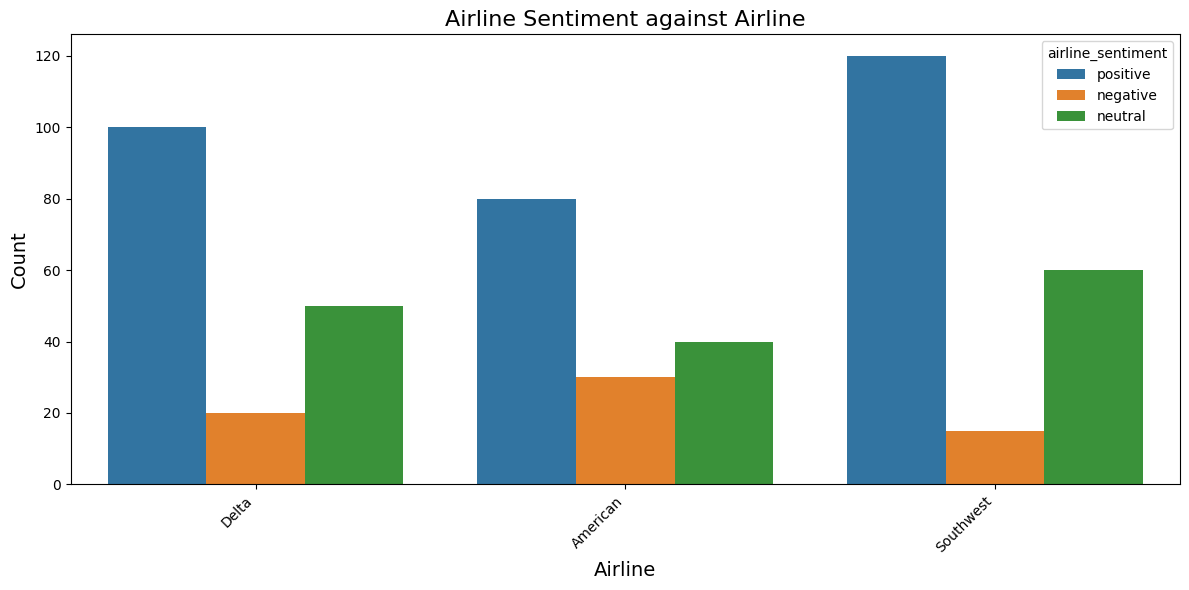

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'matrix' is your pivot table with 'airline_sentiment' as index and 'airline' as columns
# Example of the matrix structure:
# matrix = pd.DataFrame({
#     'airline_sentiment': ['positive', 'negative', 'neutral'],
#     'Delta': [100, 20, 50],
#     'American': [80, 30, 40],
#     'Southwest': [120, 15, 60]
# })

# Reshaping the data for plotting
melted_matrix = matrix.reset_index().melt(id_vars='airline_sentiment', var_name='airline', value_name='count')

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='airline', y='count', hue='airline_sentiment', data=melted_matrix)

# Rotate the x-axis labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add title and labels
plt.title('Airline Sentiment against Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Correlation between airline and negativereason_confidence: -0.008955077175929893


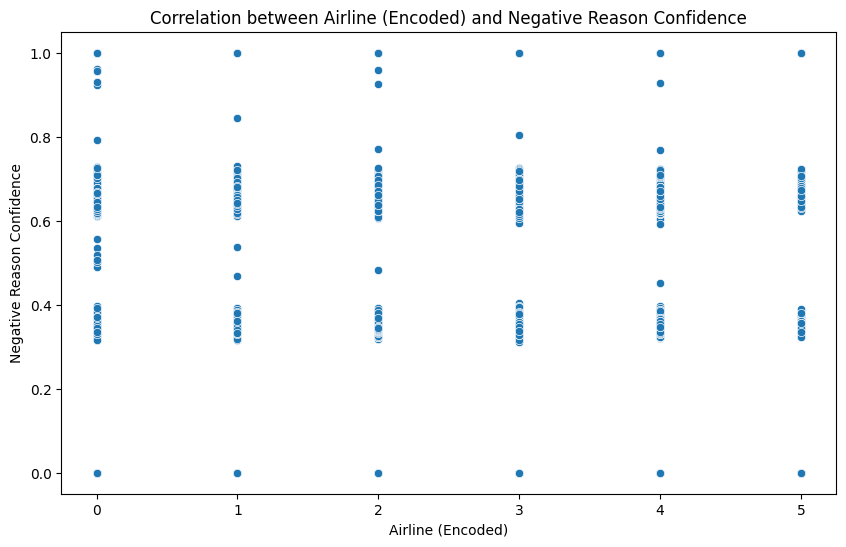

In [15]:
# prompt: find corelation between airline and negativereason_confidence

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/Datasets/Tweets.csv")

# Calculate the correlation between 'airline' and 'negativereason_confidence'
# First, convert 'airline' to numerical values using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline_encoded'] = le.fit_transform(df['airline'])

# Calculate the correlation
correlation = df['airline_encoded'].corr(df['negativereason_confidence'])
print(f"Correlation between airline and negativereason_confidence: {correlation}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='airline_encoded', y='negativereason_confidence', data=df)
plt.title('Correlation between Airline (Encoded) and Negative Reason Confidence')
plt.xlabel('Airline (Encoded)')
plt.ylabel('Negative Reason Confidence')
plt.show()

In [16]:
# prompt: tell me which airline has the most negative sentiment and negativereason

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Datasets/Tweets.csv")

# Group by airline and sentiment, then count occurrences
airline_sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

# Find the airline with the maximum negative sentiment count
airline_with_most_negative = airline_sentiment_counts['negative'].idxmax()

print(f"The airline with the most negative sentiment is: {airline_with_most_negative}")

# Group by airline and negative reason, then count occurrences
airline_negativereason_counts = df.groupby(['airline', 'negativereason']).size().unstack(fill_value=0)

# Find the airline with the maximum count for any negative reason
# This will give you the airline with most complaints in total from any negative reason
airline_with_most_negative_reason = airline_negativereason_counts.sum(axis=1).idxmax()
print(f"The airline with the most negative reasons is: {airline_with_most_negative_reason}")

# To get the specific negative reason with the highest count for each airline:
def get_most_frequent_negative_reason(airline_data):
    return airline_data['negativereason'].value_counts().index[0]

most_frequent_neg_reasons = df.groupby('airline').apply(get_most_frequent_negative_reason)

print("\nMost frequent negative reason for each airline:")
most_frequent_neg_reasons

The airline with the most negative sentiment is: United
The airline with the most negative reasons is: United

Most frequent negative reason for each airline:


<ipython-input-16-4631eee9a338>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_frequent_neg_reasons = df.groupby('airline').apply(get_most_frequent_negative_reason)


,0
airline,
American,Customer Service Issue
Delta,Late Flight
Southwest,Customer Service Issue
US Airways,Customer Service Issue
United,Customer Service Issue
Virgin America,Customer Service Issue


In [17]:
df["negativereason"].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [18]:
df["negativereason"].value_counts()

,count
negativereason,
Customer Service Issue,2910
Late Flight,1665
Can't Tell,1190
Cancelled Flight,847
Lost Luggage,724
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,481
longlines,178


In [19]:
# prompt: make a table for airline and their airline_sentiment_gold and negativereason_gold and thier user_timezone

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Datasets/Tweets.csv")

# Create the table
table = pd.pivot_table(df, values='user_timezone', index=['airline', 'airline_sentiment_gold', 'negativereason_gold'], aggfunc='count')

# Display the table
table

user_timezone
airline    airline_sentiment_gold negativereason_gold                                    
American   negative               Customer Service Issue                                3
                                  Customer Service Issue\nLost Luggage                  1
                                  Flight Attendant Complaints                           1
                                  Late Flight                                           1
                                  Late Flight\nCancelled Flight                         1
Delta      negative               Can't Tell                                            1
                                  Cancelled Flight                                      2
                                  Customer Service Issue                                1
                                  Customer Service Issue\nCan't Tell                    0
                                  Late Flight                                           1
                                  Lost Luggage\nDamaged Luggage                         1
Southwest  negative               Bad Flight                                            0
                                  Cancelled Flight\nCustomer Service Issue              1
                                  Customer Service Issue                                3
US Airways negative               Can't Tell                                            1
                                  Late Flight                                           1
United     negative               Can't Tell                                            1
                                  Cancelled Flight                                      1
                                  Cancelled Flight\nCustomer Service Issue              1
                                  Customer Service Issue                                1
                                  Late Flight                                           0
                                  Late Flight\nFlight Attendant Complaints              0
                                  Late Flight\nLost Luggage                             1

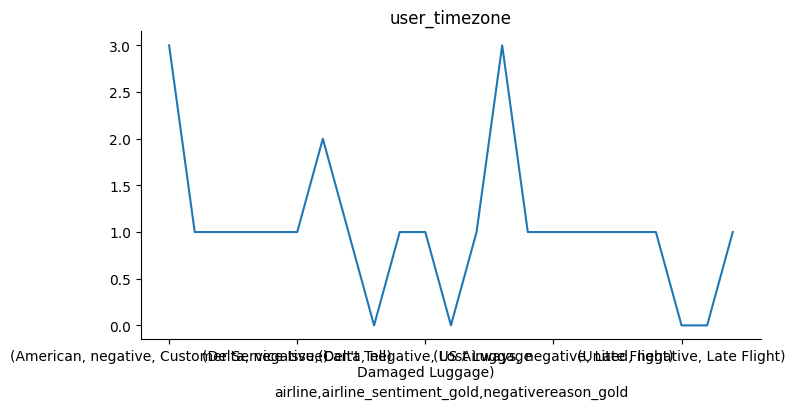

In [20]:
# @title user_timezone

from matplotlib import pyplot as plt
table['user_timezone'].plot(kind='line', figsize=(8, 4), title='user_timezone')
plt.gca().spines[['top', 'right']].set_visible(False)